In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data
from datetime import datetime

---

## Exercises

The end result of this exercise should be a file named acquire.py.

#### 1. Using the code from the lesson as a guide and the REST API from https://python.zgulde.net/api/v1/items as we did in the lesson, create a dataframe named items that has all of the data for items.
#### 2. Do the same thing, but for stores (https://python.zgulde.net/api/v1/stores)
#### 3. Extract the data for sales (https://python.zgulde.net/api/v1/sales). There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.
#### 4. Save the data in your files to local csv files so that it will be faster to access in the future.
#### 5. Combine the data from your three separate dataframes into one large dataframe.
#### 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
#### 7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

#### 1. Using the code from the lesson as a guide and the REST API from https://python.zgulde.net/api/v1/items as we did in the lesson, create a dataframe named items that has all of the data for items.
#### 2. Do the same thing, but for stores (https://python.zgulde.net/api/v1/stores)
#### 3. Extract the data for sales (https://python.zgulde.net/api/v1/sales). There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.
#### 4. Save the data in your files to local csv files so that it will be faster to access in the future.
#### 5. Combine the data from your three separate dataframes into one large dataframe.
#### 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
#### 7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

---

---

## Exercises: 

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

**from vega_datasets import data<br>
data.sf_temps()**

Use the above dataset for the exercises below:

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
#### 2. Write the code necessary to visualize the minimum temperature over time.
#### 3. Write the code necessary to visualize the maximum temperature over time.
#### 4. Which month is the coldest, on average?
#### 5. Which month has the highest average temperature?
#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

-------------

**from vega_datasets import data<br>
data.seattle_weather()**

#### Which year and month combination has the highest amount of precipitation?
#### Visualize the amount of monthly precipitation over time.
#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.
#### Which year-month combination is the windiest?
#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
#### In which month does it rain the most?
#### Which month has the most number of days with a non-zero amount of precipitation?

---------

data.flights_20k()

Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?
Bonus

from vega_datasets import data
data.iowa_electricity()

For each row, calculate the percentage of the year's total that energy source provided.
Lineplot of generation over time, color by source
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
Is the total generation increasing over time?
How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total
Use the sf_temps dataset
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
Create pretty labels for time plots
Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar
Explore the birdstrikes dataset.


df = data.birdstrikes()

---

### SF Temps

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [13]:
#add them all
temps['year'] = temps.date.dt.year
temps['month'] = temps.date.dt.month
temps['day'] = temps.date.dt.day

In [14]:
temps

,temp,date,year,month,day
0,47.8,2010-01-01 00:00:00,2010,1,1
1,47.4,2010-01-01 01:00:00,2010,1,1
2,46.9,2010-01-01 02:00:00,2010,1,1
3,46.5,2010-01-01 03:00:00,2010,1,1
4,46.0,2010-01-01 04:00:00,2010,1,1
...,...,...,...,...,...
8754,50.4,2010-12-31 19:00:00,2010,12,31
8755,49.9,2010-12-31 20:00:00,2010,12,31
8756,49.4,2010-12-31 21:00:00,2010,12,31
8757,48.8,2010-12-31 22:00:00,2010,12,31


In [17]:
temps = temps.set_index('date')
temps

,temp,year,month,day
date,,,,
2010-01-01 00:00:00,47.8,2010,1,1
2010-01-01 01:00:00,47.4,2010,1,1
2010-01-01 02:00:00,46.9,2010,1,1
2010-01-01 03:00:00,46.5,2010,1,1
2010-01-01 04:00:00,46.0,2010,1,1
...,...,...,...,...
2010-12-31 19:00:00,50.4,2010,12,31
2010-12-31 20:00:00,49.9,2010,12,31
2010-12-31 21:00:00,49.4,2010,12,31


In [20]:
temps.resample('D').mean()

,temp,year,month,day
date,,,,
2010-01-01,49.170833,2010.0,1.0,1.0
2010-01-02,49.304167,2010.0,1.0,2.0
2010-01-03,49.391667,2010.0,1.0,3.0
2010-01-04,49.445833,2010.0,1.0,4.0
2010-01-05,49.491667,2010.0,1.0,5.0
...,...,...,...,...
2010-12-27,48.991667,2010.0,12.0,27.0
2010-12-28,49.000000,2010.0,12.0,28.0
2010-12-29,49.012500,2010.0,12.0,29.0


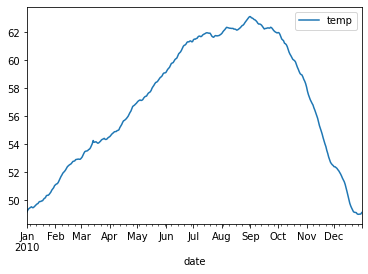

In [40]:
temps[['temp']].resample('D').mean().plot()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

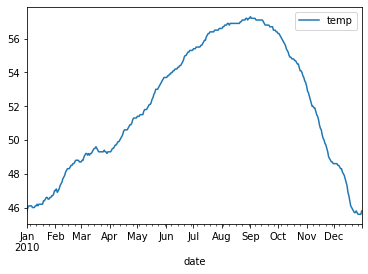

In [28]:
temps[['temp']].resample('D').min().plot()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

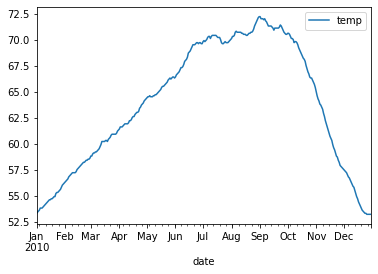

In [27]:
temps[['temp']].resample('D').max().plot()
plt.show()

#### 4. Which month is the coldest, on average?

In [38]:
temps[['temp', 'month']].groupby('month').mean()

,temp
month,
1,49.984140
2,52.243899
3,53.956528
4,55.633056
5,57.970968
6,60.444722
7,61.765457
8,62.405376
9,62.487083


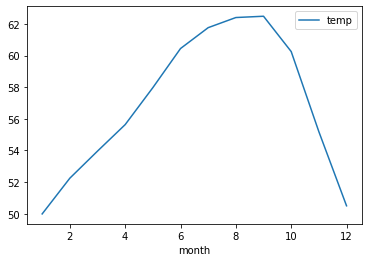

In [37]:
temps[['temp', 'month']].groupby('month').mean().plot()
plt.show()

#### 5. Which month has the highest average temperature?

In [45]:
temps[['temp', 'month']].groupby('month').mean().idxmax()

temp    9
dtype: int64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [54]:
df = temps.resample('D').agg(['min', 'max']).temp
df

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [55]:
df['difference'] = (temps.resample('D').agg(['min', 'max']).temp)['max'] - (temps.resample('D').agg(['min', 'max']).temp)['min']

In [56]:
df

,min,max,difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [57]:
temps['difference'] = df['difference']

In [ ]:
df['month']

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [59]:
df.drop(columns='month').resample('D').agg(['min', 'max', 'mean'])

,min,max,difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


---

In [61]:
se = data.seattle_weather()
se

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


#### Which year and month combination has the highest amount of precipitation?

In [62]:
se['year'] = se.date.dt.year
se['month'] = se.date.dt.month
se['day'] = se.date.dt.day

In [63]:
se

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,fog,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [68]:
se = se.set_index('date')

In [69]:
se

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,2015,12,27
2015-12-28,1.5,5.0,1.7,1.3,fog,2015,12,28
2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29


#### Visualize the amount of monthly precipitation over time.

In [77]:
se[['precipitation']].resample('M').mean()

,precipitation
date,
2012-01-31,5.590323
2012-02-29,3.182759
2012-03-31,5.903226
2012-04-30,2.270000
2012-05-31,1.683871
2012-06-30,2.503333
2012-07-31,0.848387
2012-08-31,0.000000
2012-09-30,0.030000


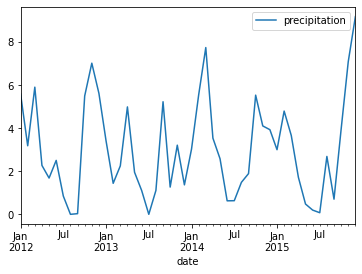

In [72]:
se[['precipitation']].resample('M').mean().plot()
plt.show()

In [78]:
se[['precipitation']].resample('M').max().idxmax()

precipitation   2015-03-31
dtype: datetime64[ns]

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

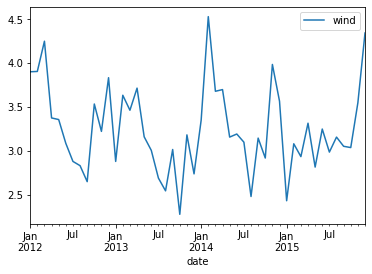

In [84]:
se[['wind']].resample('M').mean().plot()
plt.show()

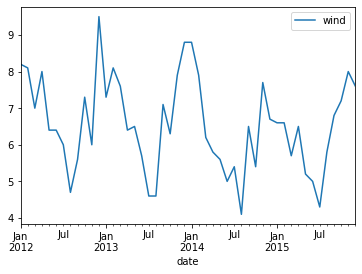

In [85]:
se[['wind']].resample('M').max().plot()
plt.show()

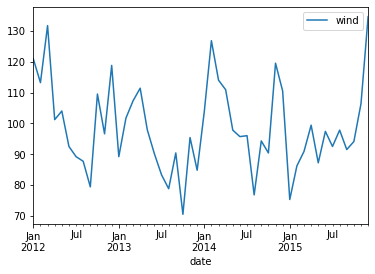

In [95]:
se[['wind']].resample('M').sum().plot()
plt.show()

In [91]:
se

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,2015,12,27
2015-12-28,1.5,5.0,1.7,1.3,fog,2015,12,28
2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29


In [94]:
se.groupby('month').sum()

,precipitation,temp_max,temp_min,wind,year,day
month,,,,,,
1,466.0,1020.4,334.4,389.2,249674,1984
2,422.0,1114.2,458.2,427.9,227524,1653
3,606.2,1536.0,602.5,443.9,249674,1984
4,375.4,1802.4,763.5,422.9,241620,1860
5,207.5,2392.7,1192.2,386.9,249674,1984
6,132.9,2688.0,1469.3,375.7,241620,1860
7,48.2,3223.8,1760.5,361.0,249674,1984
8,163.7,3237.9,1831.4,341.1,249674,1984
9,235.5,2630.9,1483.0,355.6,241620,1860


#### Which year-month combination is the windiest?

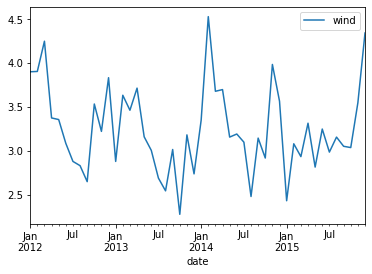

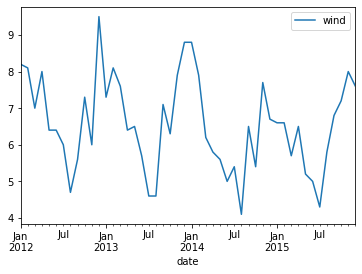

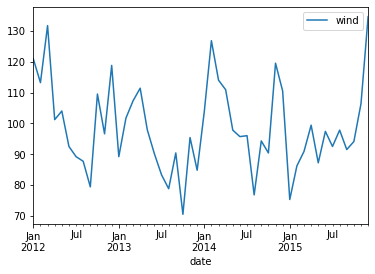

In [112]:
se[['wind']].resample('M').mean().plot()
plt.title('')
plt.show()

se[['wind']].resample('M').max().plot()

plt.show()

se[['wind']].resample('M').sum().plot()
plt.title('')
plt.show()

In [111]:
print(se[['wind']].resample('M').sum().idxmax())
print(se[['wind']].resample('M').mean().idxmax())
print(se[['wind']].resample('M').max().idxmax())

wind   2015-12-31
dtype: datetime64[ns]
wind   2014-02-28
dtype: datetime64[ns]
wind   2012-12-31
dtype: datetime64[ns]


#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [113]:
se.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [126]:
(se.weather == 'sun').sum()

714

In [130]:
se.groupby('year')

In [ ]:
.sum().is_sunny.sort_values

#### In which month does it rain the most?

#### Which month has the most number of days with a non-zero amount of precipitation?

---

data.flights_20k()

Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?
Bonus

In [138]:
f = data.flights_20k()
f

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [139]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [140]:
f = f.set_index('date')

In [141]:
f

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


In [142]:
f[f.delay < 0]

,delay,distance,origin,destination
date,,,,
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
2001-01-27 07:00:00,-13,588,BNA,BWI
2001-01-02 11:40:00,-1,395,MDW,BNA
...,...,...,...,...
2001-01-16 13:40:00,-8,223,BUR,LAS
2001-01-26 13:50:00,-10,534,RDU,MCO
2001-03-17 07:00:00,-15,256,LAS,PHX


In [143]:
np.where(f.delay < 0, 0, f.delay)

array([32,  0,  3, ...,  0, 42,  0])

Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?
Bonus

---

data.iowa_electricity()

Use the sf_temps dataset
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
Create pretty labels for time plots
Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [151]:
el = data.iowa_electricity()
el

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


For each row, calculate the percentage of the year's total that energy source provided.

In [152]:
#add them all
el['month'] = el.year.dt.month
el['day'] = el.year.dt.day

el = el.set_index('year')

In [153]:
el.head()

,year,source,net_generation,month,day
0,2001-01-01,Fossil Fuels,35361,1,1
1,2002-01-01,Fossil Fuels,35991,1,1
2,2003-01-01,Fossil Fuels,36234,1,1
3,2004-01-01,Fossil Fuels,36205,1,1
4,2005-01-01,Fossil Fuels,36883,1,1


Lineplot of generation over time, color by source

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

Is the total generation increasing over time?

How would you control for increasing consumption over time when considering how much energy is coming from each source?

express each number as a % of the year's total

---

Explore the birdstrikes dataset.

df = data.birdstrikes()

---

# Preparation:

### Exercises, The end result of this exercise should be a file named prepare.py.
#### Using your store items data:

#### Convert date column to datetime format.

#### Plot the distribution of sale_amount and item_price.

#### Set the index to be the datetime variable.

#### Add a 'month' and 'day of week' column to your dataframe.

#### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

#### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

#### Convert date column to datetime format.

#### Plot the distribution of each of your variables.

#### Set the index to be the datetime variable.

#### Add a month and a year column to your dataframe.

#### Fill any missing values

#### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.